<a href="https://colab.research.google.com/github/KartikeyaTripathi/Google-Kickstart/blob/master/MlProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import keras      

In [5]:
from keras.datasets import mnist

In [6]:
data = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
len(train_images)

60000

In [8]:
len(test_images)

10000

In [9]:
len(test_labels)

10000

In [9]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [10]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [11]:
train_images = train_images.astype('float')/255 #normalization/scaling 

In [12]:
test_images = test_images.astype('float')/255

In [13]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

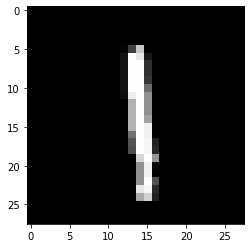

In [14]:
plt.imshow(image.array_to_img(train_images[8]), cmap = "gray")

In [15]:
train_labels[8]

1

In [16]:
from keras.utils import to_categorical
train_labels_original = train_labels
train_labels = to_categorical(train_labels)

In [17]:
train_labels[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
test_labels_original = test_labels
test_labels = to_categorical(test_labels)

In [19]:
test_labels_original[7]

9

In [20]:
test_labels[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [21]:
from keras import layers, models

In [22]:
model = models.Sequential()

In [23]:
model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape = (28,28,1)))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.add(layers.MaxPooling2D((2,2)))

In [26]:
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.add(layers.MaxPooling2D((2,2)))

In [29]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.add(layers.Flatten())

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.add(layers.Dense(64, activation = 'relu'))

In [33]:
model.add(layers.Dense(10,activation= 'softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
dense (Dense)                (None, 3, 3, 64)          4160      
_________________________________________________________________
dense_1 (Dense)              (None, 3, 3, 10)          6

In [37]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [38]:
model.fit(train_images, train_labels, epochs = 100, batch_size=64)

Epoch 1/100


ValueError: ignored